In [4]:
import os
import random
import torch
import torch.nn as nn
import torchvision
import kornia
import numpy as np
manualSeed = 303
random.seed(manualSeed)
torch.manual_seed(manualSeed)

In [11]:
mae_loss = nn.L1Loss()
mse_loss = nn.MSELoss()
r = []
f_mean_filter = []
f_median_filter = []
f_gaussian_filter = []
psnr_1 = 0
psnr_2 = 0
psnr_3 = 0

mae_1 = 0
mae_2 = 0
mae_3 = 0

mse_1 = 0
mse_2 = 0
mse_3 = 0

ssim_1 = 0
ssim_2 = 0
ssim_3 = 0

for x in test_loader:
    # 원본 -> (0,1) 사이의 픽셀 값
    x = x.view(batch_size, ch, image_size, image_size)
    print(x.shape)
    r.append(x)
    # 잡음 추가
    x_noise = add_noise("gauss",x).float()
        
    # mean filter 잡음 제거
    dst_mean = kornia.filters.blur_pool2d(x_noise,3,1).clip(0,1)
    f_mean_filter.append(dst_mean)
    
    psnr_1 += PSNR(dst_mean, x)/len(test_loader)
    mae_1 += mae_loss(dst_mean, x)/len(test_loader)
    mse_1 += mse_loss(dst_mean, x)/len(test_loader)
    ssim_1 += (kornia.metrics.ssim(dst_mean, x, window_size=11).mean())
    
    # median filter 잡음 제거
    dst_median =  kornia.filters.median_blur(x_noise,(3,3)).clip(0,1)
    f_median_filter.append(dst_median)
    
    psnr_2 += PSNR(dst_median, x)/len(test_loader)
    mae_2 += mae_loss(dst_median, x)/len(test_loader)
    mse_2 += mse_loss(dst_median, x)/len(test_loader)
    ssim_2 += (kornia.metrics.ssim(dst_median, x, window_size=11).mean())
    
    # gaussian filter 잡음 제거
    dst_gauss = kornia.filters.gaussian_blur2d(x_noise,(3,3),(1.5, 1.5)).clip(0,1)
    f_gaussian_filter.append(dst_gauss)
    psnr_3 += PSNR(dst_gauss, x)/len(test_loader)
    mae_3 += mae_loss(dst_gauss, x)/len(test_loader)
    mse_3 += mse_loss(dst_gauss, x)/len(test_loader)
    ssim_3 += (kornia.metrics.ssim(dst_gauss, x, window_size=11).mean())

ssim_1 = ssim_1/len(test_loader)    
ssim_2 = ssim_2/len(test_loader)
ssim_3 = ssim_3/len(test_loader)


print("Mean Filter")
print("PSNR : {:1f}, MAE : {:1f}, MSE : {:1f}, SSIM : {:1f}".format(psnr_1, mae_1, mse_1, ssim_1))
print("----------------")
print("Median Filter")
print("PSNR : {:1f}, MAE : {:1f}, MSE : {:1f}, SSIM : {:1f}".format(psnr_2, mae_2, mse_2, ssim_2))
print("----------------")
print("Gaussian Filter")
print("PSNR : {:1f}, MAE : {:1f}, MSE : {:1f}, SSIM : {:1f}".format(psnr_3, mae_3, mse_3, ssim_3))


torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
torch.Size([32, 1, 128, 128])
Mean Filter
PSNR : 26.818795, MAE : 0.033039, MSE : 0.002083, SSIM : 0.644711
----------------
Median Filter
PSNR : 26.843000, MAE : 0.034498, MSE : 0.002071, SSIM : 0.617652
----------------
Gaussian Filter
PSNR : 28.561877, MAE : 0.028539, MSE : 0.001394, SSIM : 0.700880


### 결과 시각화

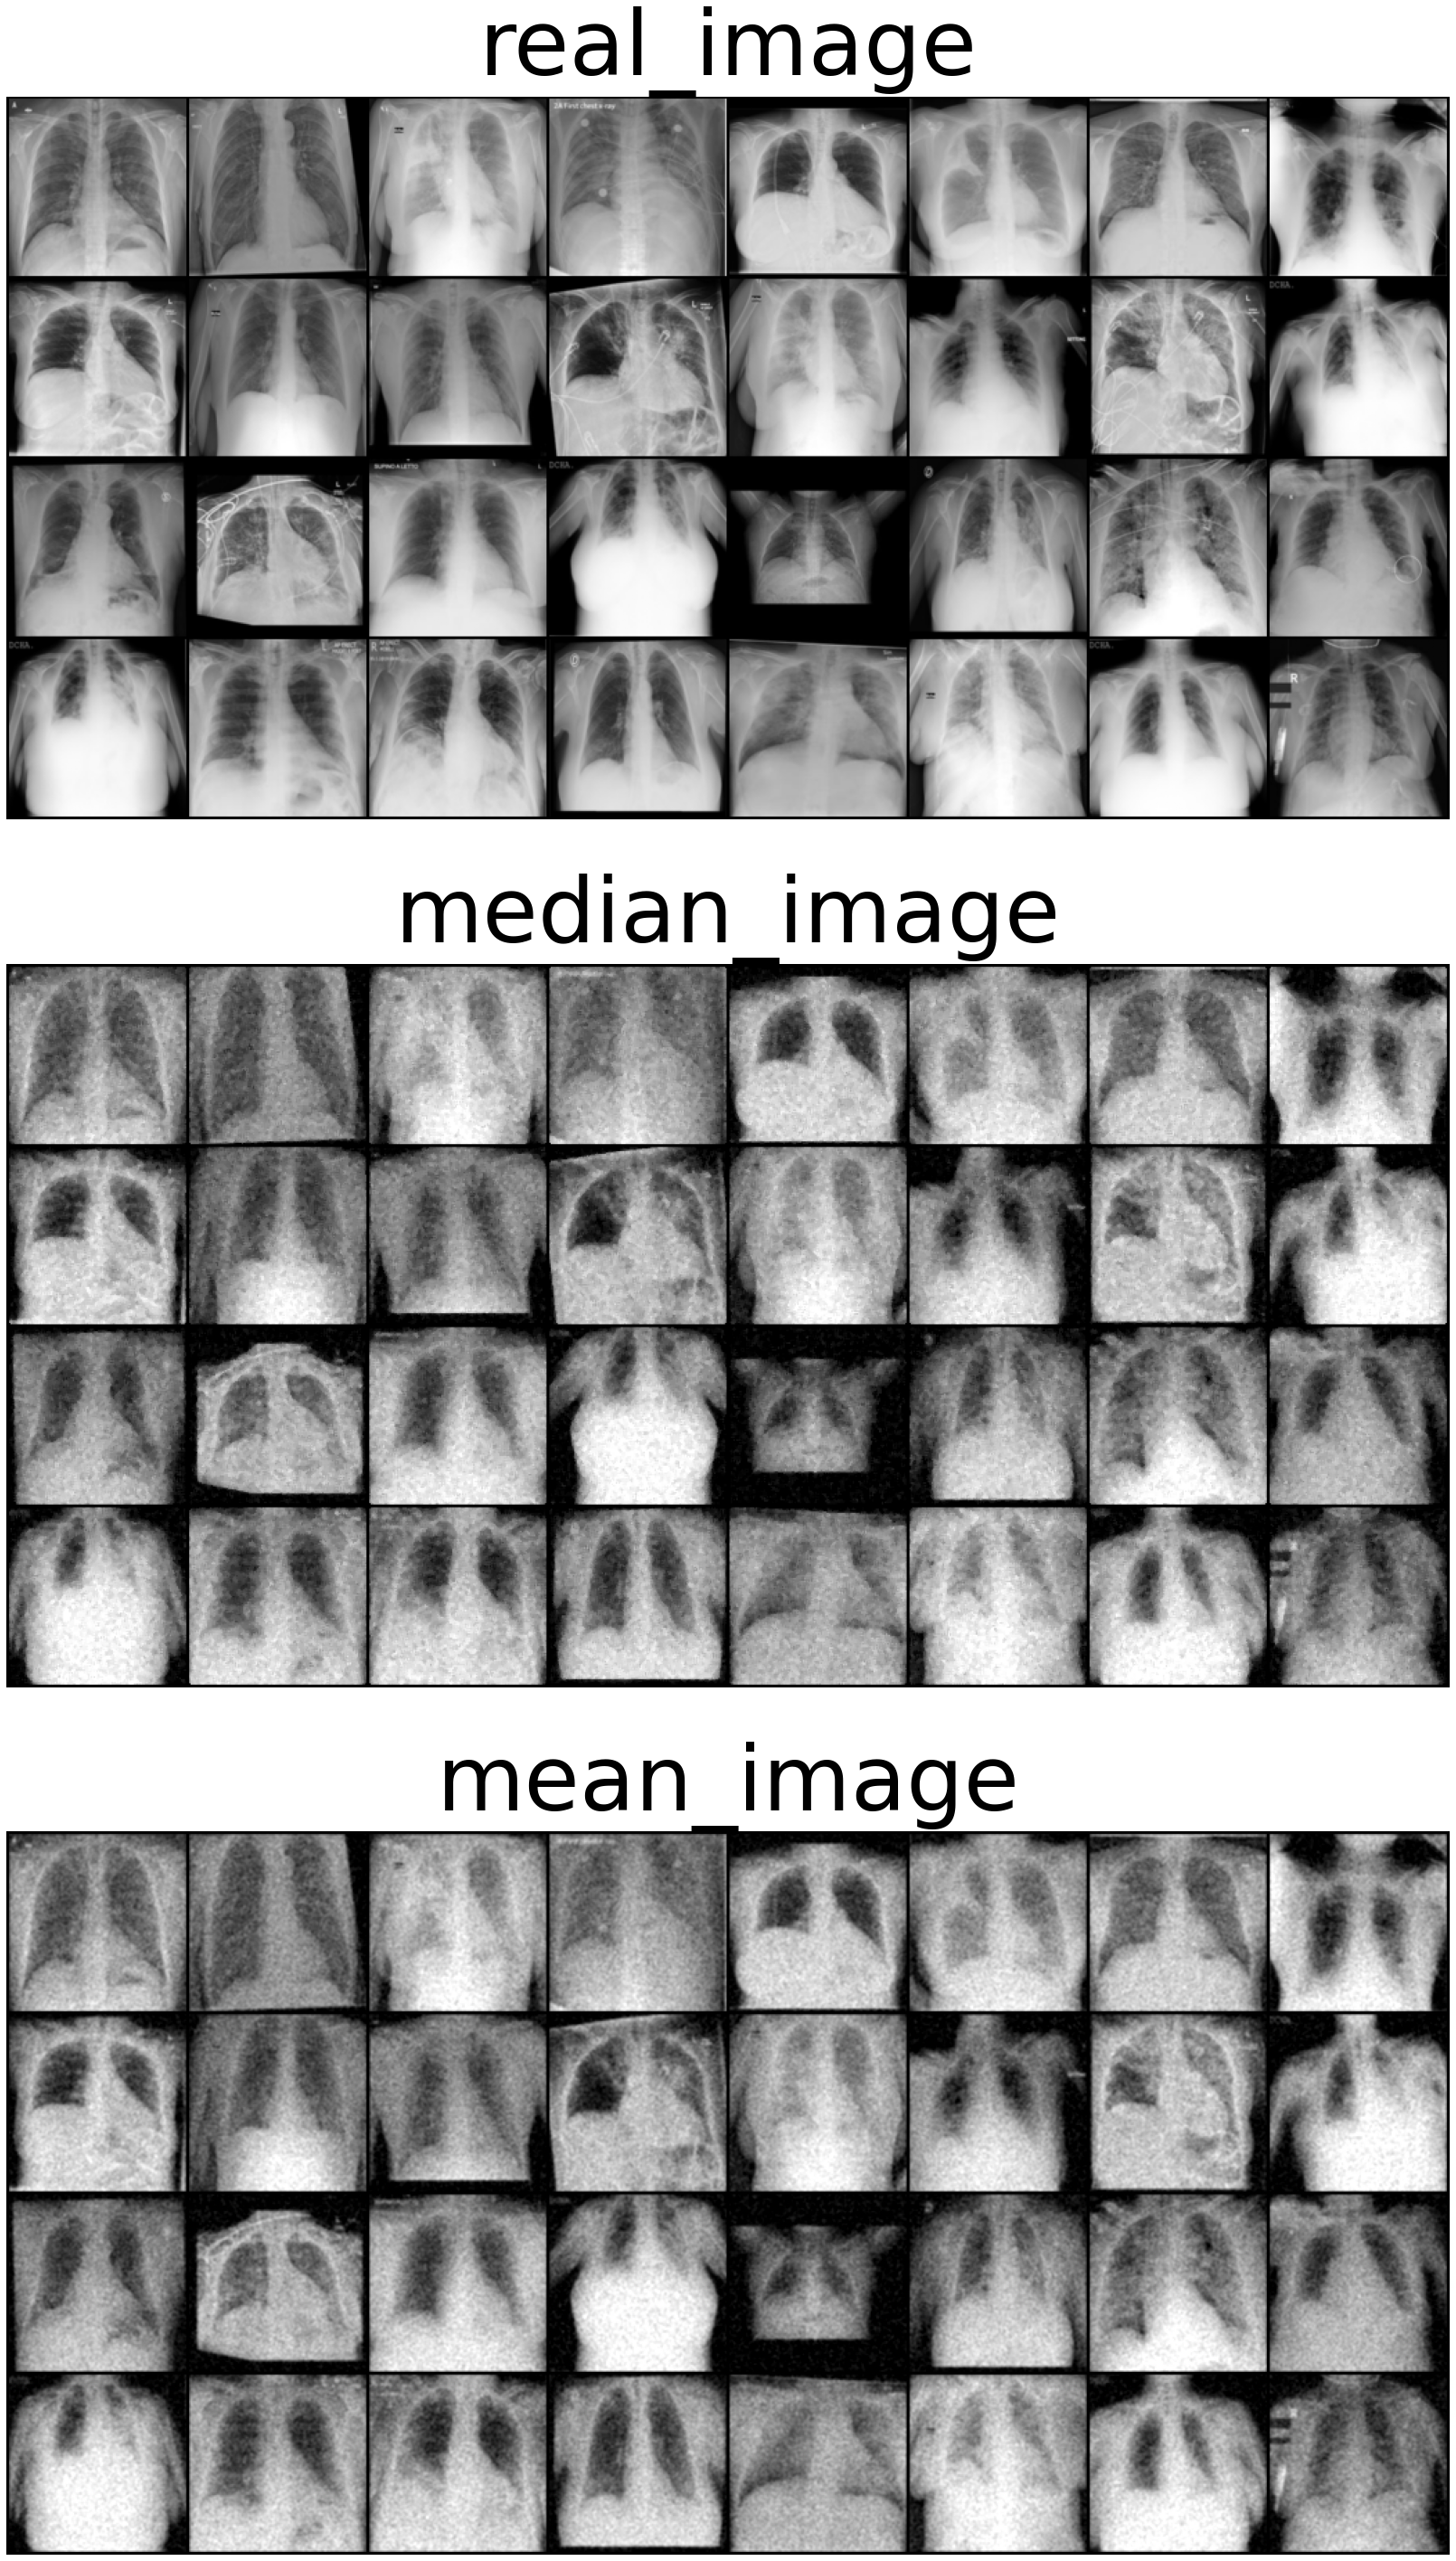

In [12]:
plt.figure(figsize=(50,50))

for ii in range(0,8,4):
    plt.subplot(3,1,1)
    plt.title('real_image',fontsize= 100)
    plt.imshow(np.transpose(utils.make_grid(r[ii]).cpu(),(1,2,0)))
    plt.axis('off')
    plt.subplot(3,1,2)
    plt.title('median_image',fontsize= 100)
    plt.imshow(np.transpose(utils.make_grid(f_median_filter[ii]).cpu(),(1,2,0)))
    plt.axis('off')
    plt.subplot(3,1,3)
    plt.title('mean_image',fontsize= 100)
    plt.imshow(np.transpose(utils.make_grid(f_mean_filter[ii]).cpu(),(1,2,0)))
    plt.axis('off')

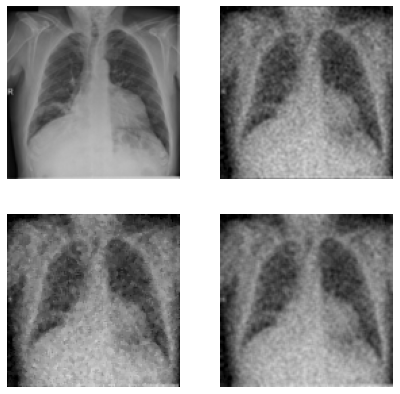

In [13]:
plt.figure(figsize=(7, 7))
plt.subplot(221)
plt.imshow(np.transpose(utils.make_grid(r[0][7]).cpu(),(1,2,0)))
plt.axis('off')

plt.subplot(222)
plt.imshow(np.transpose(utils.make_grid(f_mean_filter[0][7]).cpu(),(1,2,0)))
plt.axis('off')

plt.subplot(223)
plt.imshow(np.transpose(utils.make_grid(f_median_filter[0][7]).cpu(),(1,2,0)))
plt.axis('off')

plt.subplot(224)
plt.imshow(np.transpose(utils.make_grid(f_gaussian_filter[0][7]).cpu(),(1,2,0)))
plt.axis('off')
plt.show()

(-0.5, 127.5, 127.5, -0.5)

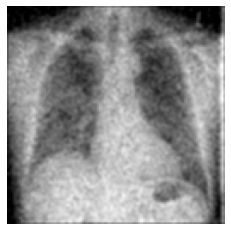

In [14]:
plt.imshow(np.transpose(utils.make_grid(f_mean_filter[0][6]).cpu(),(1,2,0)))
plt.axis('off')